In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance

In [8]:
# Dataset
data_path = '/content/data.csv'
df = pd.read_csv(data_path)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [9]:
# Memeriksa nilai kosong/null
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64


In [10]:
# Preprocessing
# Memisahkan features dan target
X = df.drop('salary', axis=1)
y = df['salary']

In [11]:
# Memberi Kode kategori
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    X[col] = label_encoders[col].fit_transform(X[col])

print("Categorical variables encoded. Example of transformed data:")
print(X.head())

Categorical variables encoded. Example of transformed data:
   age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           1             1     4    1          2174             0   
1           4             0     4    1             0             0   
2           6             1     4    1             0             0   
3           6             0     2    1             0             0   
4          10             5     2    0             0             0   

   hours-per-week  country  
0              40       39  
1              13       39  
2    

In [12]:
# Mengitung numerical features
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])
print("Numerical features scaled. Example of transformed data:")
print(X.head())

Numerical features scaled. Example of transformed data:
        age  workclass    fnlwgt  education  education-num  marital-status  \
0  0.030671   2.150579 -1.063611  -0.335437       1.134739        0.921634   
1  0.837109   1.463736 -1.008707  -0.335437       1.134739       -0.406212   
2 -0.042642   0.090050  0.245079   0.181332      -0.420060       -1.734058   
3  1.057047   0.090050  0.425801  -2.402511      -1.197459       -0.406212   
4 -0.775768   0.090050  1.408176  -0.335437       1.134739       -0.406212   

   occupation  relationship      race       sex  capital-gain  capital-loss  \
0   -1.317809     -0.277805  0.393668  0.703071      0.148453      -0.21666   
1   -0.608387     -0.900181  0.393668  0.703071     -0.145920      -0.21666   
2   -0.135438     -0.277805  0.393668  0.703071     -0.145920      -0.21666   
3   -0.135438     -0.900181 -1.962621  0.703071     -0.145920      -0.21666   
4    0.810458      2.211698 -1.962621 -1.422331     -0.145920      -0.21666   



In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Data split into training and testing sets.")

Data split into training and testing sets.


Exploratory Data Analysis:
Shape of the dataset: (32561, 15)
Distribution of target variable:
salary
0    24720
1     7841
Name: count, dtype: int64


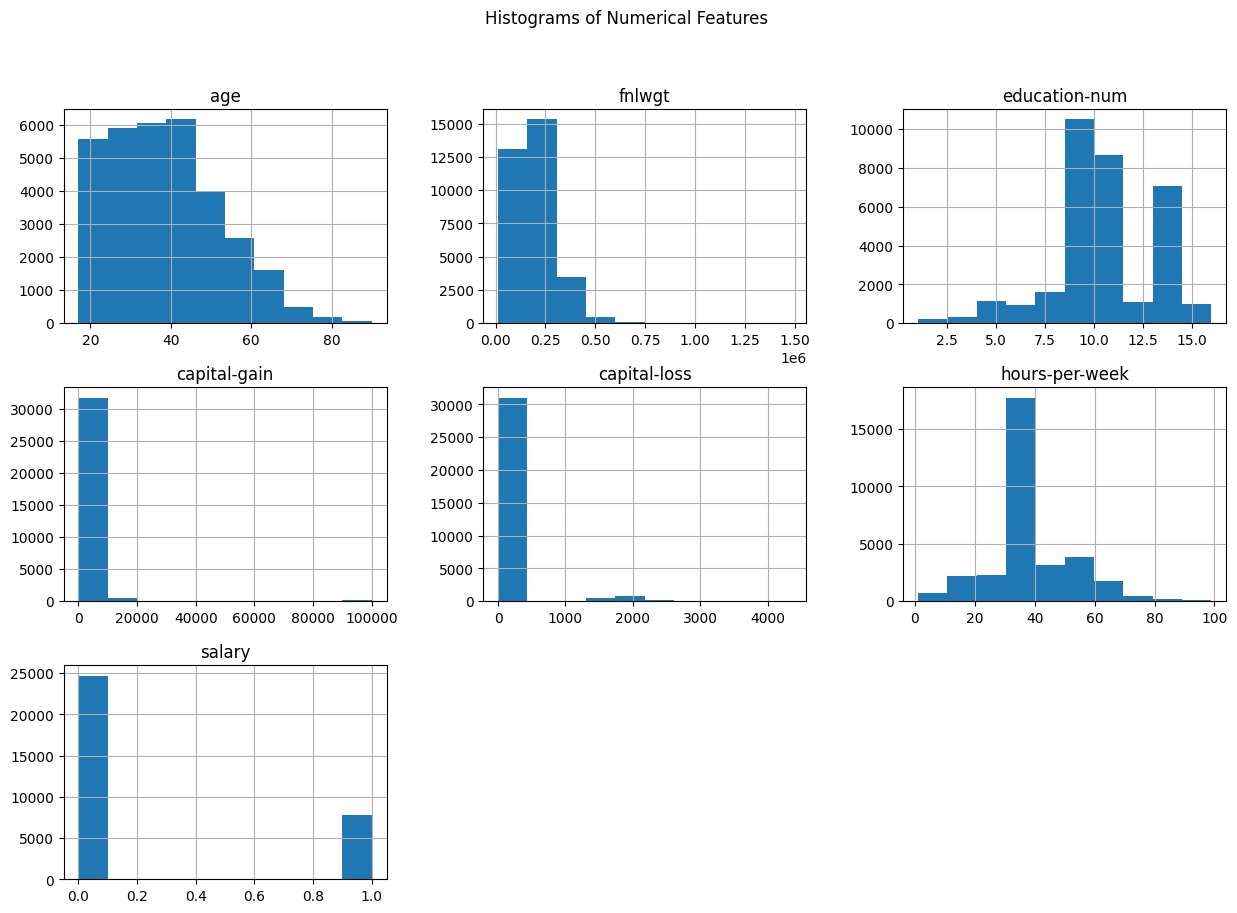

In [14]:
# Exploratory Data Analysis (EDA)
print("Exploratory Data Analysis:")
print("Shape of the dataset:", df.shape)
print("Distribution of target variable:")
print(y.value_counts())
df.hist(figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

In [15]:
# Feature Selection
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Extrak feature importances
feature_importances = rf_model.feature_importances_
important_features = np.argsort(feature_importances)[-10:]  # Top 10 features
print("Top 10 important features:")
for idx in important_features:
    print(f"{X.columns[idx]}: {feature_importances[idx]:.4f}")

Top 10 important features:
capital-loss: 0.0342
workclass: 0.0408
occupation: 0.0685
marital-status: 0.0702
hours-per-week: 0.0828
education-num: 0.0918
relationship: 0.0956
capital-gain: 0.1180
age: 0.1540
fnlwgt: 0.1654


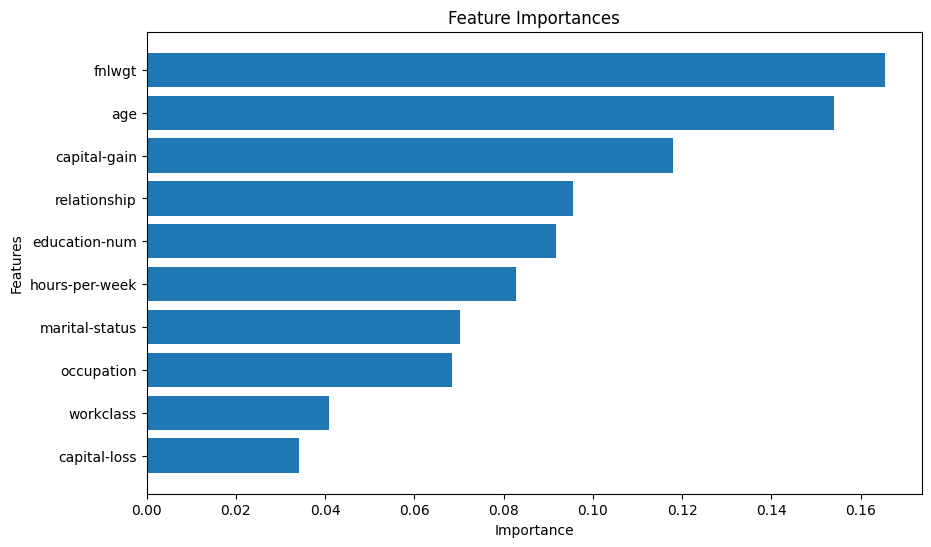

In [17]:
# Visualisasi feature importance
plt.figure(figsize=(10, 6))
plt.barh([X.columns[i] for i in important_features], feature_importances[important_features])
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [18]:
# Features teratas
X_train_selected = X_train.iloc[:, important_features]
X_test_selected = X_test.iloc[:, important_features]
print("Dataset reduced to top 10 important features.")


Dataset reduced to top 10 important features.


In [19]:
# Modeling
# Random Forest
rf_selected_model = RandomForestClassifier(random_state=42)
rf_selected_model.fit(X_train_selected, y_train)
y_pred_rf = rf_selected_model.predict(X_test_selected)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7417
           1       0.74      0.62      0.67      2352

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769

Random Forest Accuracy: 0.8559


In [21]:
#Modeling
# Gradient Boosting Machines
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train_selected, y_train)
y_pred_gbm = gbm_model.predict(X_test_selected)

print("Gradient Boosting Machines Classification Report:")
print(classification_report(y_test, y_pred_gbm))
print(f"Gradient Boosting Machines Accuracy: {accuracy_score(y_test, y_pred_gbm):.4f}")

Gradient Boosting Machines Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      7417
           1       0.80      0.60      0.69      2352

    accuracy                           0.87      9769
   macro avg       0.84      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769

Gradient Boosting Machines Accuracy: 0.8676


In [22]:
# Evaluasi Model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
gbm_accuracy = accuracy_score(y_test, y_pred_gbm)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Gradient Boosting Machines Accuracy: {gbm_accuracy:.4f}")

#Membandingkan
if gbm_accuracy > rf_accuracy:
    print("Gradient Boosting Machines performed better.")
else:
    print("Random Forest performed better.")

Random Forest Accuracy: 0.8559
Gradient Boosting Machines Accuracy: 0.8676
Gradient Boosting Machines performed better.
